In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

# print("Path to dataset files:", path)

# Load Dataset

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [5]:
df = df.drop(columns=['Transaction ID'])
df.head(5)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
product_category = df['Product Category'].unique()
print(f"Categories: {product_category}")

Categories: ['Beauty' 'Clothing' 'Electronics']


In [7]:
customer_ID = df['Customer ID'].nunique()
print(f"Number of unique customer ID: {customer_ID}")

Number of unique customer ID: 1000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [9]:
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,Friday
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,Monday
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,Friday
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,Sunday
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,Saturday


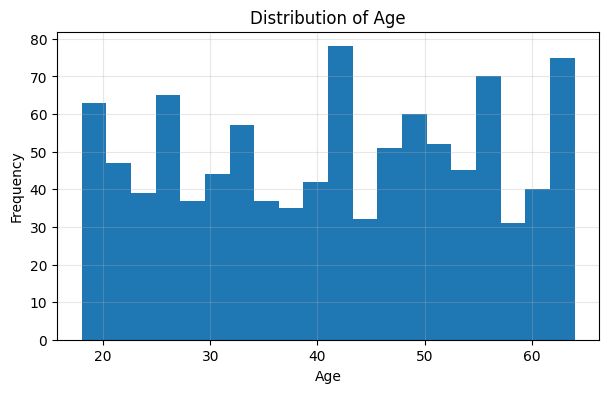

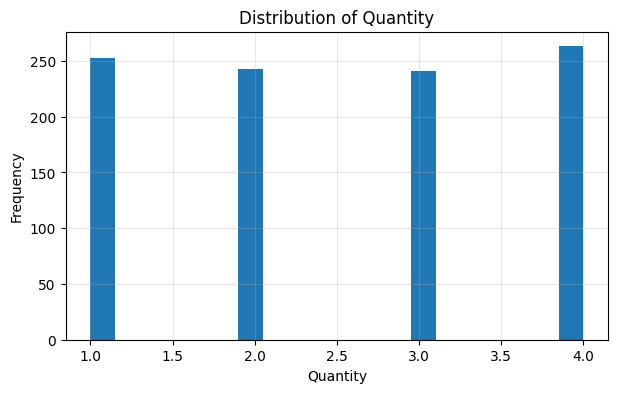

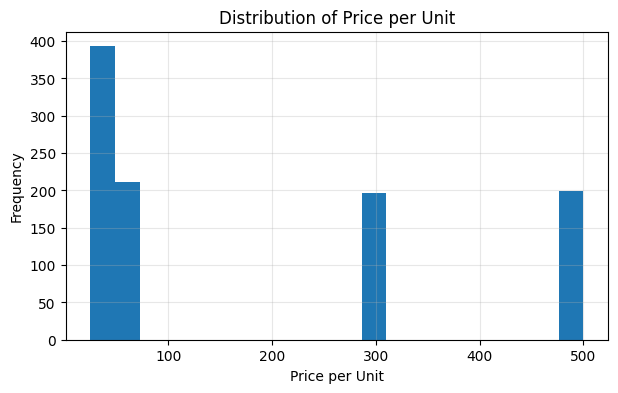

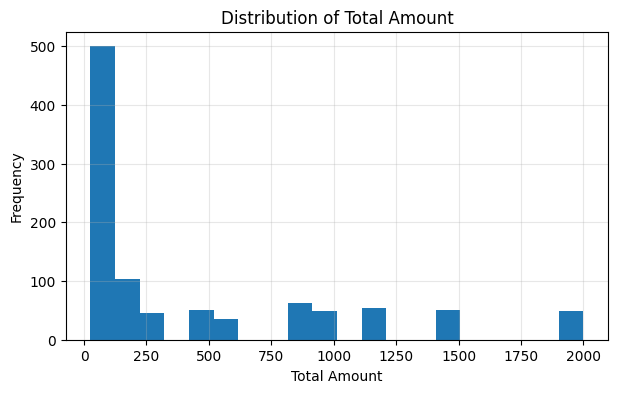

In [11]:
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

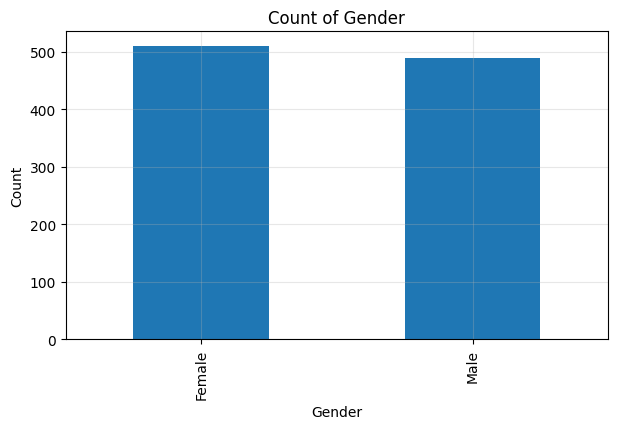

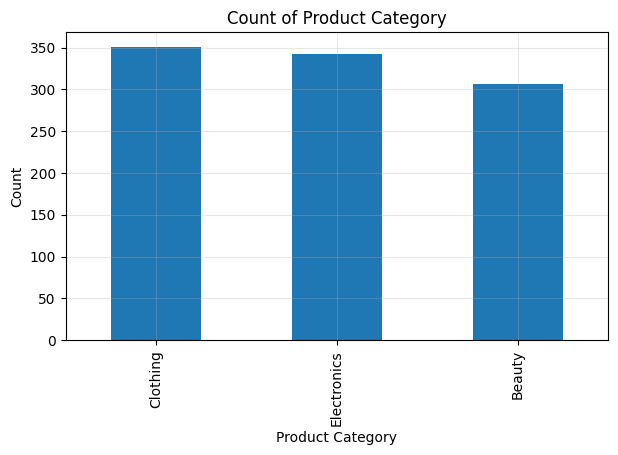

In [13]:
categorical_cols = ["Gender", "Product Category"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.show()

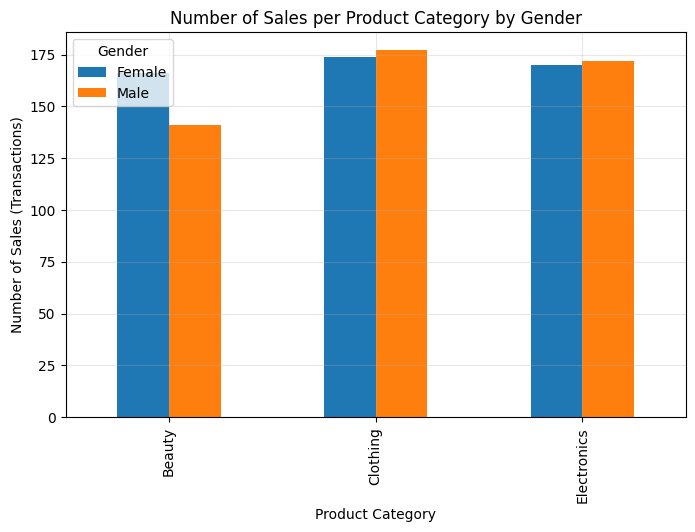

In [ ]:
# Group by Product Category & Gender
category_gender_counts = df.groupby(["Product Category", "Gender"]).size().unstack()

# Plot
category_gender_counts.plot(kind="bar", figsize=(8,5))
plt.title("Number of Sales per Product Category by Gender")
plt.xlabel("Product Category")
plt.ylabel("Number of Sales (Transactions)")
plt.grid(alpha=0.3)
plt.legend(title="Gender")
plt.show()

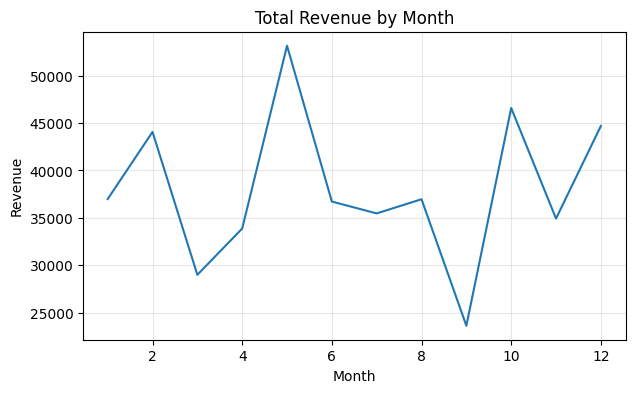

In [14]:
monthly_revenue = df.groupby("Month")["Total Amount"].sum()

plt.figure(figsize=(7,4))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

In [24]:
# Sort by date
df = df.sort_values("Date")

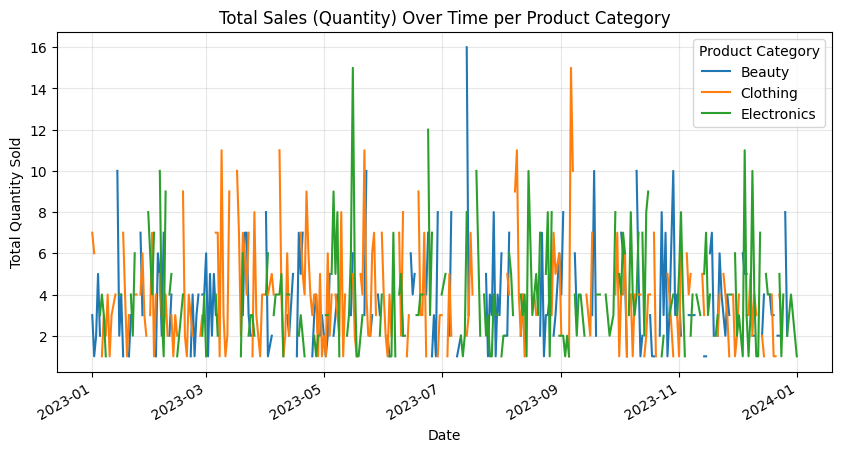

In [ ]:
# Total sales (Quantity) over time per category

sales_over_time = df.groupby(["Date", "Product Category"])["Quantity"].sum().unstack()
sales_over_time.plot(figsize=(10,5))
plt.title("Total Sales (Quantity) Over Time per Product Category")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.grid(alpha=0.3)
plt.show()


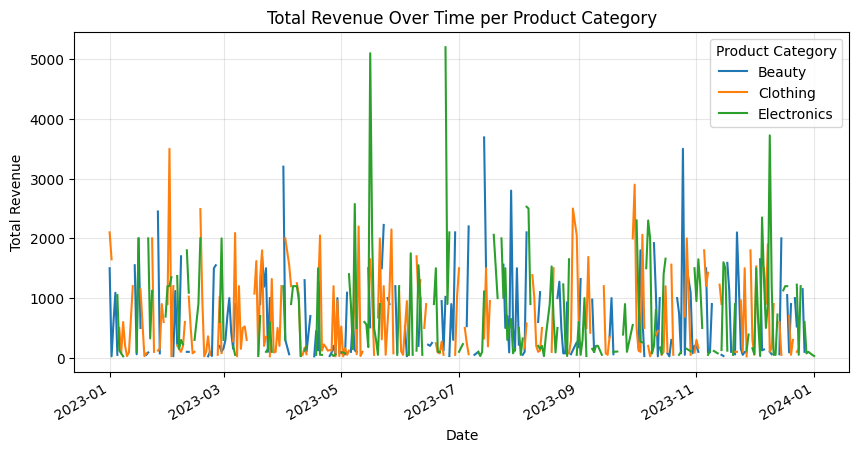

In [29]:
# Total Revenue Over Time Per Category

revenue_over_time = df.groupby(["Date", "Product Category"])["Total Amount"].sum().unstack()
revenue_over_time.plot(figsize=(10,5))
plt.title("Total Revenue Over Time per Product Category")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(alpha=0.3)
plt.show()

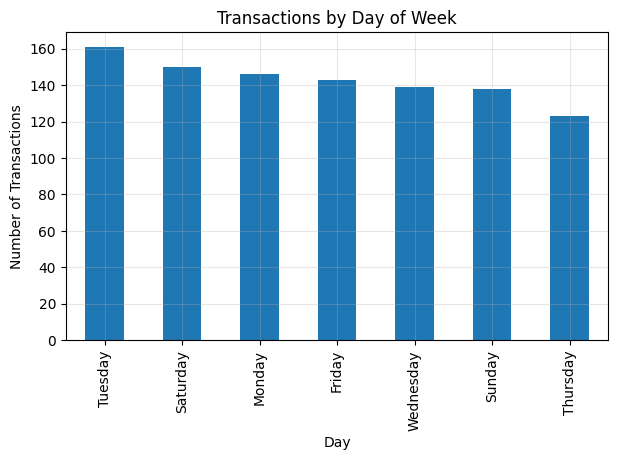

In [16]:
dow_count = df["Day"].value_counts()

plt.figure(figsize=(7,4))
dow_count.plot(kind="bar")
plt.title("Transactions by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.grid(alpha=0.3)
plt.show()

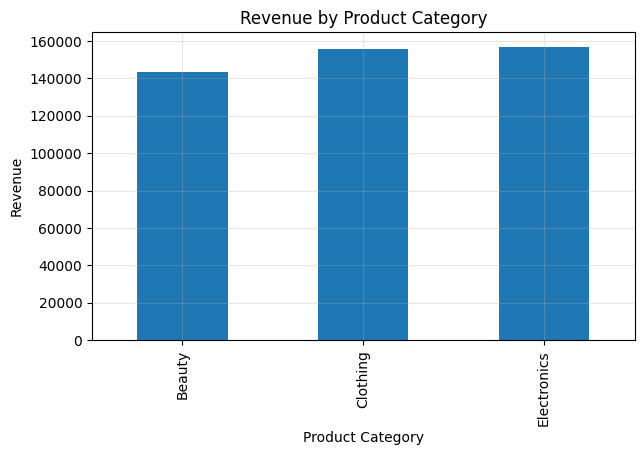

In [17]:
category_revenue = df.groupby("Product Category")["Total Amount"].sum()

plt.figure(figsize=(7,4))
category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

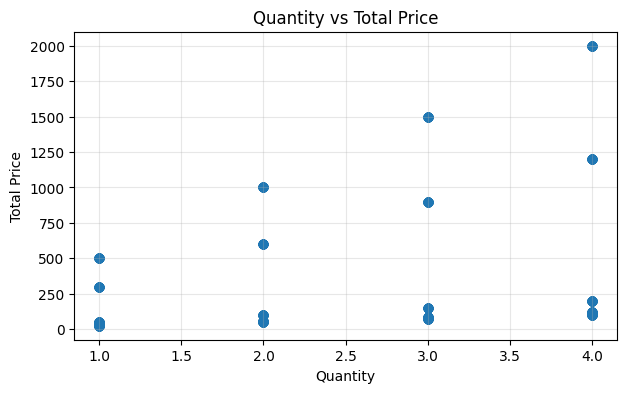

In [22]:
# Quantity vs Total Price
plt.figure(figsize=(7,4))
plt.scatter(df["Quantity"], df["Total Amount"])
plt.title("Quantity vs Total Price")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.grid(alpha=0.3)
plt.show()

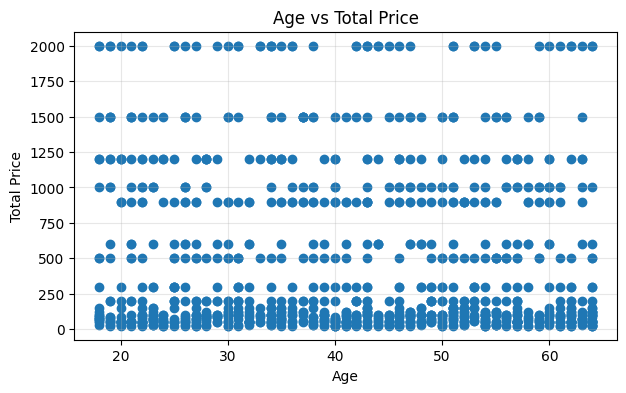

In [23]:
plt.figure(figsize=(7,4))
plt.scatter(df["Age"], df["Total Amount"])
plt.title("Age vs Total Price")
plt.xlabel("Age")
plt.ylabel("Total Price")
plt.grid(alpha=0.3)
plt.show()

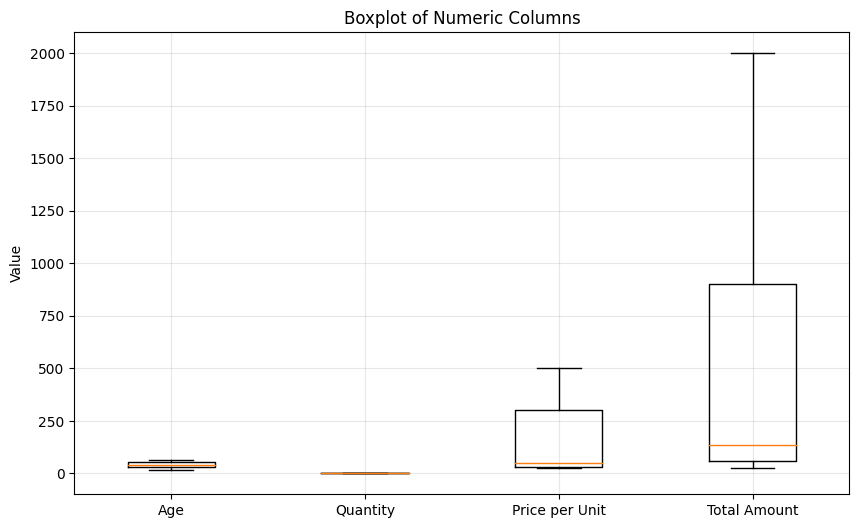

In [ ]:
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

plt.figure(figsize=(10,6))
plt.boxplot([df[col] for col in numeric_cols], labels=numeric_cols)
plt.title("Boxplot of Numeric Columns")
plt.ylabel("Value")
plt.grid(alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

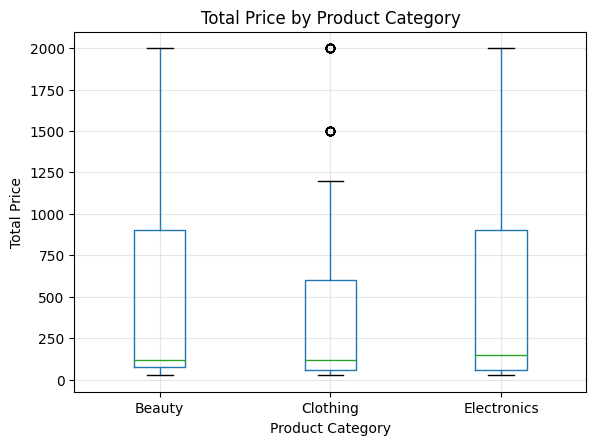

In [34]:
plt.figure(figsize=(10,6))
df.boxplot(column="Total Amount", by="Product Category")
plt.title("Total Price by Product Category")
plt.suptitle("")   # removes default pandas title
plt.xlabel("Product Category")
plt.ylabel("Total Price")
plt.grid(alpha=0.3)
plt.show()

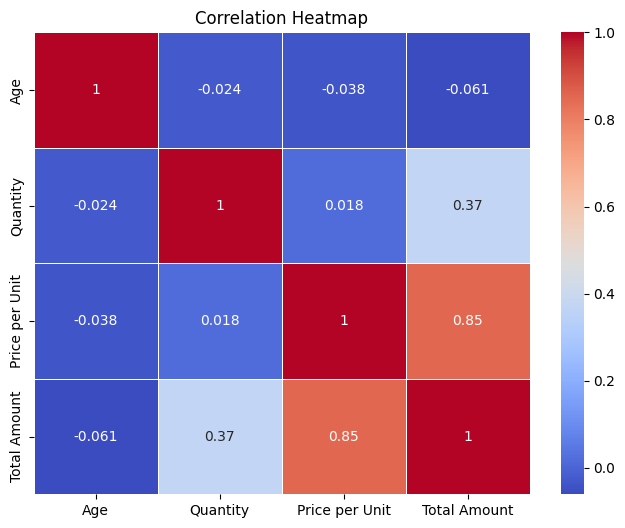

In [35]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()